#Carga de Dados

In [1]:
import pandas as pd

In [4]:
contabil_df = pd.read_csv('data/contabil.csv')
contabil_df.head()

,id,transaction_event_id,transaction_type_id,transaction_name,amount,created_date,is_processed
0,1,1,3,Compra de Informática,4139.719188,2023-08-13,False
1,2,2,3,Compra de Informática,3099.849151,2023-03-03,False
2,3,3,5,Compra de Acessórios,4006.901197,2023-07-12,False
3,4,4,4,Estorno de Informática,-2316.136797,2023-06-03,True
4,5,5,3,Compra de Informática,4634.992174,2023-02-25,True


In [5]:
customers_df = pd.read_csv('data/customers.csv')
customers_df.head()

,customer_id,name,join_date,region
0,1,Joshua Kramer,2022-12-08,Sudeste
1,2,Molly Bradley,2020-06-23,Sul
2,3,Deborah Rios,2022-01-20,Sul
3,4,Savannah Garcia,2020-12-19,Centro-Oeste
4,5,Cindy Hopkins,2022-11-28,Sudeste


In [6]:
products_df = pd.read_csv('data/products.csv')
products_df.head()

,product_id,name,category,price
0,1,Notebook Dell,Informática,1500
1,2,iPhone,Eletrônicos,3000
2,3,Monitor LG,Informática,600
3,4,Teclado Logitech,Acessórios,200
4,5,Mouse Microsoft,Acessórios,100


In [7]:
transacitons_df = pd.read_csv('data/transactions.csv')
transacitons_df.head()

,transaction_id,customer_id,product_id,transaction_date,amount
0,1,41,16,2023-08-13,4139.719188
1,2,30,17,2023-03-03,3099.849151
2,3,60,4,2023-07-12,4006.901197
3,4,29,11,2023-06-03,2316.136797
4,5,68,11,2023-02-25,4634.992174


#Análise Python

In [11]:
merged_df = transacitons_df.merge(customers_df, on='customer_id', how='inner')
merged_df.head()

,transaction_id,customer_id,product_id,transaction_date,amount,name,join_date,region
0,1,41,16,2023-08-13,4139.719188,Juan Anderson,2020-01-14,Centro-Oeste
1,6,41,6,2023-04-26,666.134146,Juan Anderson,2020-01-14,Centro-Oeste
2,77,41,9,2023-01-04,3096.232666,Juan Anderson,2020-01-14,Centro-Oeste
3,99,41,11,2023-09-25,4743.078422,Juan Anderson,2020-01-14,Centro-Oeste
4,103,41,2,2023-07-08,3578.034642,Juan Anderson,2020-01-14,Centro-Oeste


In [12]:
merged_df = merged_df.merge(products_df, on='product_id', how='inner')
merged_df.head()

,transaction_id,customer_id,product_id,transaction_date,amount,name_x,join_date,region,name_y,category,price
0,1,41,16,2023-08-13,4139.719188,Juan Anderson,2020-01-14,Centro-Oeste,Placa de Vídeo NVIDIA,Informática,2000
1,734,81,16,2023-07-28,1611.300692,Julie Gonzales,2020-09-09,Norte,Placa de Vídeo NVIDIA,Informática,2000
2,18,55,16,2023-09-12,3777.744494,Jeffrey Williams,2021-04-10,Sul,Placa de Vídeo NVIDIA,Informática,2000
3,50,61,16,2023-12-23,3060.455614,Edward Dudley,2020-02-02,Sul,Placa de Vídeo NVIDIA,Informática,2000
4,27,83,16,2023-07-03,2188.300652,Katelyn Butler,2020-08-28,Sudeste,Placa de Vídeo NVIDIA,Informática,2000


##Total de vendas por região

In [24]:
total_vendas_por_regiao = merged_df.groupby('region')['amount'].sum().sort_values(ascending=True).reset_index()
total_vendas_por_regiao

,region,amount
0,Norte,431463.417295
1,Centro-Oeste,440456.376522
2,Sul,520534.982648
3,Nordeste,562888.001775
4,Sudeste,605502.991437


In [33]:
total_vendas_por_regiao['amount'] = total_vendas_por_regiao['amount'].round(2)
total_vendas_por_regiao

,region,amount
0,Norte,431463.42
1,Centro-Oeste,440456.38
2,Sul,520534.98
3,Nordeste,562888.00
4,Sudeste,605502.99


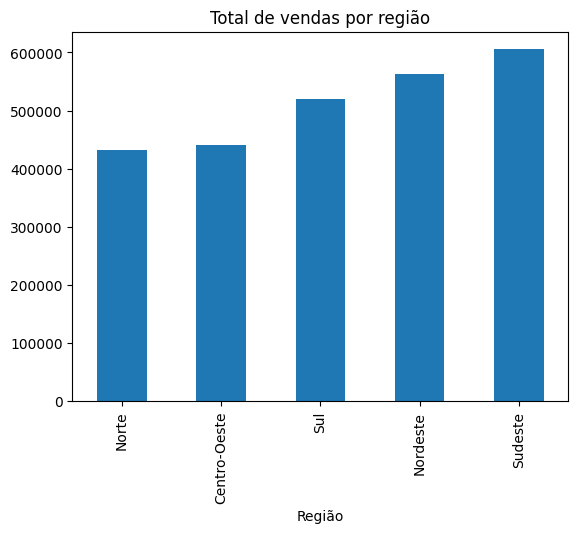

In [57]:
from matplotlib import pyplot as plt
total_vendas_por_regiao.plot(kind='bar', x='region', y='amount', title='Total de vendas por região', legend=False)
plt.xlabel('Região')
plt.show()

##5 Produtos mais vendidos

In [94]:
produtos_mais_vendidos_por_valor = merged_df.groupby(['name_y','price'])['amount'].sum().sort_values(ascending=False).head(5).reset_index()
produtos_mais_vendidos_por_valor.rename(columns={'name_y': 'product'}, inplace=True)
produtos_mais_vendidos_por_valor

,product,price,amount
0,Placa de Vídeo NVIDIA,2000,174748.723354
1,Roteador TP-Link,150,154586.360954
2,iPhone,3000,150974.830800
3,HD Externo Seagate,400,140602.823345
4,Câmera Canon,2500,138725.359600


In [95]:
produtos_mais_vendidos_por_valor['amount']= produtos_mais_vendidos_por_valor['amount'].round(2)
produtos_mais_vendidos_por_valor

,product,price,amount
0,Placa de Vídeo NVIDIA,2000,174748.72
1,Roteador TP-Link,150,154586.36
2,iPhone,3000,150974.83
3,HD Externo Seagate,400,140602.82
4,Câmera Canon,2500,138725.36


In [98]:
produtos_mais_vendidos_por_quantidade = merged_df['name_y'].value_counts().sort_values(ascending=False).head(5).reset_index()
produtos_mais_vendidos_por_quantidade.rename(columns={'name_y': 'product'}, inplace=True)
produtos_mais_vendidos_por_quantidade

,product,count
0,Placa de Vídeo NVIDIA,61
1,Roteador TP-Link,59
2,HD Externo Seagate,57
3,Fonte Corsair,57
4,iPhone,55


##Média de vendas diárias

In [48]:
vendas_diarias = merged_df.groupby('transaction_date')['amount'].sum().reset_index()
media_vendas_diarias = vendas_diarias['amount'].mean().round(2)
media_vendas_diarias


7531.9

In [49]:
quantidade_vendas_diarias = merged_df.groupby('transaction_date').size().reset_index(name='quantidade_vendas')
media_quantidade_vendas_diarias = quantidade_vendas_diarias['quantidade_vendas'].mean()
media_quantidade_vendas_diarias


2.9411764705882355

In [50]:
print(f'A média de vendas diárias é de {media_vendas_diarias} e a média de quantidade de vendas diárias é de {media_quantidade_vendas_diarias}')

A média de vendas diárias é de 7531.9 e a média de quantidade de vendas diárias é de 2.9411764705882355


#Análise Contábil


##Margem de lucro

In [61]:
merged_df['profit_margin'] = merged_df['amount'] * 0.25
merged_df.head()

,transaction_id,customer_id,product_id,transaction_date,amount,name_x,join_date,region,name_y,category,price,profit_margin
0,1,41,16,2023-08-13,4139.719188,Juan Anderson,2020-01-14,Centro-Oeste,Placa de Vídeo NVIDIA,Informática,2000,1034.929797
1,734,81,16,2023-07-28,1611.300692,Julie Gonzales,2020-09-09,Norte,Placa de Vídeo NVIDIA,Informática,2000,402.825173
2,18,55,16,2023-09-12,3777.744494,Jeffrey Williams,2021-04-10,Sul,Placa de Vídeo NVIDIA,Informática,2000,944.436124
3,50,61,16,2023-12-23,3060.455614,Edward Dudley,2020-02-02,Sul,Placa de Vídeo NVIDIA,Informática,2000,765.113903
4,27,83,16,2023-07-03,2188.300652,Katelyn Butler,2020-08-28,Sudeste,Placa de Vídeo NVIDIA,Informática,2000,547.075163


In [63]:
margem_lucro = merged_df.groupby('region')['profit_margin'].sum().sort_values(ascending=False).round(2).reset_index()
margem_lucro

,region,profit_margin
0,Sudeste,151375.75
1,Nordeste,140722.00
2,Sul,130133.75
3,Centro-Oeste,110114.09
4,Norte,107865.85


In [64]:
margem_lucro_total = margem_lucro['profit_margin'].sum()
margem_lucro_total

640211.44

##Maior e menor volume de vendas por período

In [66]:
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

In [70]:
vendas_mes = merged_df.groupby(merged_df['transaction_date'].dt.to_period('M'))['amount'].sum().round(2).sort_values(ascending=False).reset_index()
vendas_mes

,transaction_date,amount
0,2023-08,251622.56
1,2023-07,249109.19
2,2023-10,235897.33
3,2023-11,229569.36
4,2023-12,218897.38
5,2023-05,217557.53
6,2023-01,214829.65
7,2023-02,211953.74
8,2023-04,199153.23
9,2023-03,186841.22


#Conciliação de Dados

In [77]:
transacoes_perdidas = transacitons_df[transacitons_df['transaction_id'].isin(contabil_df['transaction_event_id']) == False]
transacoes_perdidas

,transaction_id,customer_id,product_id,transaction_date,amount


Todas transações foram registradas no contábil

##Transações estornadas

In [79]:
estornos_df = contabil_df[contabil_df['transaction_name'].str.contains('Estorno')]
estornos_df.head()

,id,transaction_event_id,transaction_type_id,transaction_name,amount,created_date,is_processed
3,4,4,4,Estorno de Informática,-2316.136797,2023-06-03,True
5,6,6,4,Estorno de Informática,-666.134146,2023-04-26,True
8,9,9,4,Estorno de Informática,-3616.948737,2023-04-20,False
9,10,10,6,Estorno de Acessórios,-965.585557,2023-06-02,True
11,12,12,4,Estorno de Informática,-2381.700798,2023-01-11,True


In [90]:
transacoes_estornadas = estornos_df.merge(transacitons_df, left_on='transaction_event_id', right_on='transaction_id', how='left', indicator=True)
transacoes_estornadas.head()
transacoes_estornadas['discrepancia'] = transacoes_estornadas['amount_x'] + transacoes_estornadas['amount_y']

discrepancias = transacoes_estornadas[transacoes_estornadas['discrepancia'] != 0]
discrepancias[['transaction_event_id', 'amount_x', 'amount_y', 'discrepancia']]

,transaction_event_id,amount_x,amount_y,discrepancia


Sem discrepâncias, considerando que em transações os valores do estorno é positivo.